# Install enviroment

In [9]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [10]:
# install dependencies: (use cu111 because colab has CUDA 11.1)
!pip install -q torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install -q mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html

ERROR: Could not find a version that satisfies the requirement torch==1.9.0+cu111 (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.0+rocm5.3, 2.0.0+rocm5.4.2)
ERROR: No matching distribution found for torch==1.9.0+cu111


In [11]:
!pip show mmcv-full

Name: mmcv-full
Version: 1.7.1
Summary: OpenMMLab Computer Vision Foundation
Home-page: https://github.com/open-mmlab/mmcv
Author: MMCV Contributors
Author-email: openmmlab@gmail.com
License: UNKNOWN
Location: /usr/local/lib/python3.10/dist-packages
Requires: addict, numpy, packaging, Pillow, pyyaml, yapf
Required-by: 


In [12]:
# Install mmdetection
%cd drive/MyDrive/mmdetection

!pip install -q -v -e .

[Errno 2] No such file or directory: 'drive/MyDrive/mmdetection'
/content/drive/MyDrive/mmdetection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/MyDrive/mmdetection
  Preparing metadata (setup.py) ... done
  Attempting uninstall: mmdet
    Found existing installation: mmdet 2.28.1
    Uninstalling mmdet-2.28.1:
      Successfully uninstalled mmdet-2.28.1
  Running setup.py develop for mmdet


In [13]:
from mmcv import collect_env
collect_env()

{'sys.platform': 'linux',
 'Python': '3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]',
 'CUDA available': True,
 'GPU 0': 'Tesla T4',
 'CUDA_HOME': '/usr/local/cuda',
 'NVCC': 'Cuda compilation tools, release 11.8, V11.8.89',
 'GCC': 'x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0',
 'PyTorch': '2.0.0+cu118',
 'PyTorch compiling details': 'PyTorch built with:\n  - GCC 9.3\n  - C++ Version: 201703\n  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - LAPACK is enabled (usually provided by MKL)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - CUDA Runtime 11.8\n  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencod

In [14]:
# Import essential library

import mmcv
from mmcv import Config

import mmdet
from mmdet.apis import set_random_seed, train_detector, inference_detector, show_result_pyplot, init_detector
from mmdet.datasets import build_dataset
from mmdet.models import build_detector

import copy
import os.path as osp

import numpy as np

In [15]:
print("MMCV version ", mmcv.__version__)
print("MMDET version ", mmdet.__version__)

MMCV version  1.7.1
MMDET version  2.28.1


# Start to train model

## Train YOLOX

In [ ]:
# Load config template file
# config_file = 'configs/yolox/yolox_x_8x8_300e_coco.py'
# config_file = 'configs/yolox/yolox_l_8x8_300e_coco.py'
config_file = 'configs/yolox/yolox_s_8x8_300e_coco.py'
cfg = Config.fromfile(config_file)

# Define type and path to the images.
# pth = 'OpenImage-Vehicle-class-only-1'
# pth = 'Left-sideview-traffic-video-2'
# pth = 'Sideview-traffic-video-3'
pth = 'front-top-traffic-video-3'

cfg.dataset_type = 'CocoDataset'
cfg.data_root = f'{pth}/'

cfg.train_dataset.dataset.ann_file = '_annotations.coco.json'
cfg.train_dataset.dataset.data_root = f'{pth}/train/'
cfg.train_dataset.dataset.img_prefix = ''
cfg.train_dataset.dataset.classes = ('Bus','Car','Motorcycle','Pickup','Truck','Van')

cfg.data.train.dataset.ann_file = '_annotations.coco.json'
cfg.data.train.dataset.data_root = f'{pth}/train/'
cfg.data.train.dataset.img_prefix = ''
cfg.data.train.dataset.classes = ('Bus','Car','Motorcycle','Pickup','Truck','Van')

cfg.data.val.ann_file = '_annotations.coco.json'
cfg.data.val.data_root = f'{pth}/valid/'
cfg.data.val.img_prefix = ''
cfg.data.val.classes = ('Bus','Car','Motorcycle','Pickup','Truck','Van')

cfg.data.test.ann_file = '_annotations.coco.json'
cfg.data.test.data_root = f'{pth}/test/'
cfg.data.test.img_prefix = ''
cfg.data.test.classes = ('Bus','Car','Motorcycle','Pickup','Truck','Van')

# modify num classes of the model in box head
cfg.model.bbox_head.num_classes = 6

# Use the pretrained model.
# cfg.load_from = 'checkpoints/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth' # YOLOX-X from Pre-train on COCO dataset
# cfg.load_from = 'train_yolox_x_on_OpenImage-Vehicle-class-only-1/best_bbox_mAP_epoch_96.pth' # YOLOX-X from OpenImage
cfg.load_from = 'checkpoints/yolox_s_8x8_300e_coco_20211121_095711-4592a793.pth' # YOLOX-S from Pre-train on COCO dataset
# cfg.load_from = 'train_yolox_s_on_OpenImage-Vehicle-class-only-1/best_bbox_mAP_epoch_72.pth' # YOLOX-S finetune on OpenImage dataset

# Set up working dir to save files and logs.
cfg.work_dir = f'./train_yolox_s_on_{pth}'

# Set up device
cfg.device = 'cuda'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'bbox'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 12
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 12

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]

# Set number of epochs
cfg.runner.max_epochs = 300

# Set batch size
cfg.data.samples_per_gpu = 8
cfg.data.workers_per_gpu = 8

# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))

loading annotations into memory...
Done (t=10.47s)
creating index...
index created!


In [ ]:
# Train model
train_detector(model, datasets, cfg, distributed=False, validate=True)

2023-04-09 08:40:33,747 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.


loading annotations into memory...


2023-04-09 08:40:36,514 - mmdet - INFO - load checkpoint from local path: checkpoints/yolox_s_8x8_300e_coco_20211121_095711-4592a793.pth


Done (t=2.74s)
creating index...
index created!


2023-04-09 08:40:37,466 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for bbox_head.multi_level_conv_cls.0.weight: copying a param with shape torch.Size([80, 128, 1, 1]) from checkpoint, the shape in current model is torch.Size([6, 128, 1, 1]).
size mismatch for bbox_head.multi_level_conv_cls.0.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([6]).
size mismatch for bbox_head.multi_level_conv_cls.1.weight: copying a param with shape torch.Size([80, 128, 1, 1]) from checkpoint, the shape in current model is torch.Size([6, 128, 1, 1]).
size mismatch for bbox_head.multi_level_conv_cls.1.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([6]).
size mismatch for bbox_head.multi_level_conv_cls.2.weight: copying a param with shape torch.Size([80, 128, 1, 1]) from checkpoint, the shape in current model is torch.Size([6, 128, 1, 1]).
size 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 9.9 task/s, elapsed: 30s, ETA:     0s

2023-04-09 08:52:24,511 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.56s).
Accumulating evaluation results...


2023-04-09 08:52:26,710 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.583
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.773
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.699
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.362
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.678
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.544
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.714
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.714
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.714
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.547
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.791
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.53s).


2023-04-09 08:52:27,140 - mmdet - INFO - Now best checkpoint is saved as best_bbox_mAP_epoch_12.pth.
2023-04-09 08:52:27,141 - mmdet - INFO - Best bbox_mAP is 0.5835 at 12 epoch.
2023-04-09 08:52:27,142 - mmdet - INFO - Epoch(val) [12][292]	bbox_mAP: 0.5835, bbox_mAP_50: 0.7728, bbox_mAP_75: 0.6986, bbox_mAP_s: 0.3624, bbox_mAP_m: 0.6781, bbox_mAP_l: 0.5438, bbox_mAP_copypaste: 0.5835 0.7728 0.6986 0.3624 0.6781 0.5438
2023-04-09 08:52:32,381 - mmdet - INFO - Epoch [13][10/195]	lr: 2.496e-03, eta: 4:25:00, time: 0.521, data_time: 0.317, memory: 6263, loss_cls: 0.6650, loss_bbox: 1.7218, loss_obj: 0.9142, loss: 3.3010
2023-04-09 08:52:34,252 - mmdet - INFO - Epoch [13][20/195]	lr: 2.496e-03, eta: 4:24:34, time: 0.187, data_time: 0.015, memory: 6263, loss_cls: 0.6117, loss_bbox: 1.6958, loss_obj: 0.8397, loss: 3.1472
2023-04-09 08:52:36,258 - mmdet - INFO - Epoch [13][30/195]	lr: 2.496e-03, eta: 4:24:12, time: 0.201, data_time: 0.018, memory: 6263, loss_cls: 0.6065, loss_bbox: 1.6555, lo

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.8 task/s, elapsed: 8s, ETA:     0s

2023-04-09 09:01:26,227 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.81s).
Accumulating evaluation results...


2023-04-09 09:01:29,057 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.531
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.719
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.638
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.311
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.649
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.430
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.660
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.660
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.660
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.467
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.755
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.65s).


2023-04-09 09:01:35,230 - mmdet - INFO - Epoch [25][10/195]	lr: 2.473e-03, eta: 3:46:46, time: 0.612, data_time: 0.320, memory: 6263, loss_cls: 0.5559, loss_bbox: 1.5431, loss_obj: 0.8692, loss: 2.9682
2023-04-09 09:01:37,110 - mmdet - INFO - Epoch [25][20/195]	lr: 2.473e-03, eta: 3:46:36, time: 0.188, data_time: 0.015, memory: 6263, loss_cls: 0.5899, loss_bbox: 1.5804, loss_obj: 0.8324, loss: 3.0027
2023-04-09 09:01:39,059 - mmdet - INFO - Epoch [25][30/195]	lr: 2.473e-03, eta: 3:46:27, time: 0.195, data_time: 0.020, memory: 6263, loss_cls: 0.6189, loss_bbox: 1.6418, loss_obj: 0.8538, loss: 3.1145
2023-04-09 09:01:41,948 - mmdet - INFO - Epoch [25][40/195]	lr: 2.473e-03, eta: 3:46:29, time: 0.289, data_time: 0.017, memory: 6263, loss_cls: 0.5804, loss_bbox: 1.6361, loss_obj: 0.8397, loss: 3.0563
2023-04-09 09:01:43,819 - mmdet - INFO - Epoch [25][50/195]	lr: 2.472e-03, eta: 3:46:19, time: 0.187, data_time: 0.018, memory: 6263, loss_cls: 0.5850, loss_bbox: 1.5811, loss_obj: 0.8646, los

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.0 task/s, elapsed: 9s, ETA:     0s

2023-04-09 09:10:30,993 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.99s).
Accumulating evaluation results...


2023-04-09 09:10:34,026 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.638
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.833
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.761
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.496
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.712
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.517
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.742
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.742
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.742
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.651
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.798
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.67s).


2023-04-09 09:10:34,453 - mmdet - INFO - Now best checkpoint is saved as best_bbox_mAP_epoch_36.pth.
2023-04-09 09:10:34,455 - mmdet - INFO - Best bbox_mAP is 0.6380 at 36 epoch.
2023-04-09 09:10:34,456 - mmdet - INFO - Epoch(val) [36][292]	bbox_mAP: 0.6380, bbox_mAP_50: 0.8329, bbox_mAP_75: 0.7615, bbox_mAP_s: 0.4962, bbox_mAP_m: 0.7124, bbox_mAP_l: 0.5173, bbox_mAP_copypaste: 0.6380 0.8329 0.7615 0.4962 0.7124 0.5173
2023-04-09 09:10:39,775 - mmdet - INFO - Epoch [37][10/195]	lr: 2.429e-03, eta: 3:28:15, time: 0.529, data_time: 0.315, memory: 6263, loss_cls: 0.5987, loss_bbox: 1.5784, loss_obj: 0.7481, loss: 2.9252
2023-04-09 09:10:41,724 - mmdet - INFO - Epoch [37][20/195]	lr: 2.428e-03, eta: 3:28:09, time: 0.195, data_time: 0.016, memory: 6263, loss_cls: 0.5604, loss_bbox: 1.5126, loss_obj: 0.7482, loss: 2.8211
2023-04-09 09:10:43,706 - mmdet - INFO - Epoch [37][30/195]	lr: 2.428e-03, eta: 3:28:03, time: 0.198, data_time: 0.018, memory: 6263, loss_cls: 0.5752, loss_bbox: 1.5166, lo

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 33.9 task/s, elapsed: 9s, ETA:     0s

2023-04-09 09:19:32,099 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.11s).
Accumulating evaluation results...


2023-04-09 09:19:35,079 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.629
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.829
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.745
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.463
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.726
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.532
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.742
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.742
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.742
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.637
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.806
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.72s).


2023-04-09 09:19:41,276 - mmdet - INFO - Epoch [49][10/195]	lr: 2.364e-03, eta: 3:14:27, time: 0.614, data_time: 0.312, memory: 6263, loss_cls: 0.5401, loss_bbox: 1.4927, loss_obj: 0.7312, loss: 2.7641
2023-04-09 09:19:43,147 - mmdet - INFO - Epoch [49][20/195]	lr: 2.364e-03, eta: 3:14:22, time: 0.187, data_time: 0.013, memory: 6263, loss_cls: 0.5517, loss_bbox: 1.4940, loss_obj: 0.7152, loss: 2.7610
2023-04-09 09:19:45,191 - mmdet - INFO - Epoch [49][30/195]	lr: 2.364e-03, eta: 3:14:18, time: 0.204, data_time: 0.019, memory: 6263, loss_cls: 0.6226, loss_bbox: 1.6454, loss_obj: 0.7770, loss: 3.0450
2023-04-09 09:19:47,240 - mmdet - INFO - Epoch [49][40/195]	lr: 2.363e-03, eta: 3:14:14, time: 0.205, data_time: 0.020, memory: 6263, loss_cls: 0.5778, loss_bbox: 1.5809, loss_obj: 0.7292, loss: 2.8878
2023-04-09 09:19:49,246 - mmdet - INFO - Epoch [49][50/195]	lr: 2.363e-03, eta: 3:14:09, time: 0.201, data_time: 0.019, memory: 6263, loss_cls: 0.6027, loss_bbox: 1.5775, loss_obj: 0.7566, los

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.6 task/s, elapsed: 8s, ETA:     0s

2023-04-09 09:28:29,289 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.89s).
Accumulating evaluation results...


2023-04-09 09:28:31,962 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.643
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.841
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.764
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.517
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.715
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.580
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.747
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.747
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.747
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.674
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.787
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.63s).


2023-04-09 09:28:32,399 - mmdet - INFO - Now best checkpoint is saved as best_bbox_mAP_epoch_60.pth.
2023-04-09 09:28:32,400 - mmdet - INFO - Best bbox_mAP is 0.6432 at 60 epoch.
2023-04-09 09:28:32,401 - mmdet - INFO - Epoch(val) [60][292]	bbox_mAP: 0.6432, bbox_mAP_50: 0.8409, bbox_mAP_75: 0.7640, bbox_mAP_s: 0.5168, bbox_mAP_m: 0.7146, bbox_mAP_l: 0.5797, bbox_mAP_copypaste: 0.6432 0.8409 0.7640 0.5168 0.7146 0.5797
2023-04-09 09:28:37,738 - mmdet - INFO - Epoch [61][10/195]	lr: 2.281e-03, eta: 3:02:24, time: 0.531, data_time: 0.320, memory: 6267, loss_cls: 0.6050, loss_bbox: 1.6070, loss_obj: 0.6991, loss: 2.9110
2023-04-09 09:28:40,645 - mmdet - INFO - Epoch [61][20/195]	lr: 2.280e-03, eta: 3:02:24, time: 0.291, data_time: 0.015, memory: 6267, loss_cls: 0.5600, loss_bbox: 1.5107, loss_obj: 0.7188, loss: 2.7895
2023-04-09 09:28:42,448 - mmdet - INFO - Epoch [61][30/195]	lr: 2.280e-03, eta: 3:02:19, time: 0.180, data_time: 0.017, memory: 6267, loss_cls: 0.6170, loss_bbox: 1.6128, lo

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 33.2 task/s, elapsed: 9s, ETA:     0s

2023-04-09 09:37:38,972 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.29s).
Accumulating evaluation results...


2023-04-09 09:37:40,775 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.661
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.848
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.789
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.488
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.731
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.630
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.758
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.758
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.758
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.678
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.793
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.44s).


2023-04-09 09:37:41,218 - mmdet - INFO - Now best checkpoint is saved as best_bbox_mAP_epoch_72.pth.
2023-04-09 09:37:41,219 - mmdet - INFO - Best bbox_mAP is 0.6606 at 72 epoch.
2023-04-09 09:37:41,221 - mmdet - INFO - Epoch(val) [72][292]	bbox_mAP: 0.6606, bbox_mAP_50: 0.8477, bbox_mAP_75: 0.7891, bbox_mAP_s: 0.4879, bbox_mAP_m: 0.7312, bbox_mAP_l: 0.6295, bbox_mAP_copypaste: 0.6606 0.8477 0.7891 0.4879 0.7312 0.6295
2023-04-09 09:37:46,471 - mmdet - INFO - Epoch [73][10/195]	lr: 2.180e-03, eta: 2:52:09, time: 0.522, data_time: 0.315, memory: 6267, loss_cls: 0.5231, loss_bbox: 1.4465, loss_obj: 0.6456, loss: 2.6152
2023-04-09 09:37:49,489 - mmdet - INFO - Epoch [73][20/195]	lr: 2.179e-03, eta: 2:52:09, time: 0.302, data_time: 0.015, memory: 6267, loss_cls: 0.5324, loss_bbox: 1.4830, loss_obj: 0.7188, loss: 2.7342
2023-04-09 09:37:51,468 - mmdet - INFO - Epoch [73][30/195]	lr: 2.179e-03, eta: 2:52:06, time: 0.198, data_time: 0.017, memory: 6267, loss_cls: 0.5455, loss_bbox: 1.4942, lo

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 35.1 task/s, elapsed: 8s, ETA:     0s

2023-04-09 09:46:42,451 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.26s).
Accumulating evaluation results...


2023-04-09 09:46:44,440 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.663
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.848
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.789
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.484
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.732
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.614
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.758
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.758
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.758
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.685
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.793
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.42s).


2023-04-09 09:46:44,891 - mmdet - INFO - Now best checkpoint is saved as best_bbox_mAP_epoch_84.pth.
2023-04-09 09:46:44,892 - mmdet - INFO - Best bbox_mAP is 0.6633 at 84 epoch.
2023-04-09 09:46:44,893 - mmdet - INFO - Epoch(val) [84][292]	bbox_mAP: 0.6633, bbox_mAP_50: 0.8484, bbox_mAP_75: 0.7893, bbox_mAP_s: 0.4836, bbox_mAP_m: 0.7319, bbox_mAP_l: 0.6140, bbox_mAP_copypaste: 0.6633 0.8484 0.7893 0.4836 0.7319 0.6140
2023-04-09 09:46:50,200 - mmdet - INFO - Epoch [85][10/195]	lr: 2.063e-03, eta: 2:42:11, time: 0.528, data_time: 0.318, memory: 6267, loss_cls: 0.5220, loss_bbox: 1.4468, loss_obj: 0.6649, loss: 2.6338
2023-04-09 09:46:52,098 - mmdet - INFO - Epoch [85][20/195]	lr: 2.062e-03, eta: 2:42:08, time: 0.190, data_time: 0.016, memory: 6267, loss_cls: 0.5596, loss_bbox: 1.5110, loss_obj: 0.6530, loss: 2.7235
2023-04-09 09:46:54,047 - mmdet - INFO - Epoch [85][30/195]	lr: 2.062e-03, eta: 2:42:05, time: 0.195, data_time: 0.018, memory: 6267, loss_cls: 0.5243, loss_bbox: 1.5019, lo

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 35.1 task/s, elapsed: 8s, ETA:     0s

2023-04-09 09:55:45,247 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.22s).
Accumulating evaluation results...


2023-04-09 09:55:46,947 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.674
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.857
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.796
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.507
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.745
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.607
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.765
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.765
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.765
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.685
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.813
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.41s).


2023-04-09 09:55:47,375 - mmdet - INFO - Now best checkpoint is saved as best_bbox_mAP_epoch_96.pth.
2023-04-09 09:55:47,376 - mmdet - INFO - Best bbox_mAP is 0.6743 at 96 epoch.
2023-04-09 09:55:47,377 - mmdet - INFO - Epoch(val) [96][292]	bbox_mAP: 0.6743, bbox_mAP_50: 0.8574, bbox_mAP_75: 0.7955, bbox_mAP_s: 0.5068, bbox_mAP_m: 0.7453, bbox_mAP_l: 0.6067, bbox_mAP_copypaste: 0.6743 0.8574 0.7955 0.5068 0.7453 0.6067
2023-04-09 09:55:52,733 - mmdet - INFO - Epoch [97][10/195]	lr: 1.932e-03, eta: 2:32:22, time: 0.532, data_time: 0.323, memory: 6267, loss_cls: 0.5115, loss_bbox: 1.4970, loss_obj: 0.6307, loss: 2.6392
2023-04-09 09:55:54,614 - mmdet - INFO - Epoch [97][20/195]	lr: 1.932e-03, eta: 2:32:19, time: 0.188, data_time: 0.015, memory: 6267, loss_cls: 0.5253, loss_bbox: 1.4076, loss_obj: 0.6383, loss: 2.5713
2023-04-09 09:55:56,503 - mmdet - INFO - Epoch [97][30/195]	lr: 1.931e-03, eta: 2:32:15, time: 0.189, data_time: 0.017, memory: 6267, loss_cls: 0.5318, loss_bbox: 1.4892, lo

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.5 task/s, elapsed: 8s, ETA:     0s

2023-04-09 10:04:48,302 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.21s).
Accumulating evaluation results...


2023-04-09 10:04:49,997 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.676
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.855
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.792
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.516
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.743
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.621
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.765
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.765
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.765
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.675
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.811
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.41s).


2023-04-09 10:04:50,428 - mmdet - INFO - Now best checkpoint is saved as best_bbox_mAP_epoch_108.pth.
2023-04-09 10:04:50,429 - mmdet - INFO - Best bbox_mAP is 0.6765 at 108 epoch.
2023-04-09 10:04:50,431 - mmdet - INFO - Epoch(val) [108][292]	bbox_mAP: 0.6765, bbox_mAP_50: 0.8550, bbox_mAP_75: 0.7920, bbox_mAP_s: 0.5161, bbox_mAP_m: 0.7430, bbox_mAP_l: 0.6208, bbox_mAP_copypaste: 0.6765 0.8550 0.7920 0.5161 0.7430 0.6208
2023-04-09 10:04:55,625 - mmdet - INFO - Epoch [109][10/195]	lr: 1.791e-03, eta: 2:22:54, time: 0.517, data_time: 0.314, memory: 6267, loss_cls: 0.4979, loss_bbox: 1.4651, loss_obj: 0.6030, loss: 2.5660
2023-04-09 10:04:57,594 - mmdet - INFO - Epoch [109][20/195]	lr: 1.790e-03, eta: 2:22:51, time: 0.197, data_time: 0.020, memory: 6267, loss_cls: 0.5613, loss_bbox: 1.5369, loss_obj: 0.6519, loss: 2.7500
2023-04-09 10:05:00,501 - mmdet - INFO - Epoch [109][30/195]	lr: 1.790e-03, eta: 2:22:50, time: 0.291, data_time: 0.018, memory: 6267, loss_cls: 0.5178, loss_bbox: 1.48

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.5 task/s, elapsed: 8s, ETA:     0s

2023-04-09 10:13:50,968 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.34s).
Accumulating evaluation results...


2023-04-09 10:13:53,071 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.666
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.847
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.781
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.509
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.737
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.606
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.753
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.753
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.753
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.670
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.798
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.44s).


2023-04-09 10:13:58,381 - mmdet - INFO - Epoch [121][10/195]	lr: 1.641e-03, eta: 2:13:35, time: 0.527, data_time: 0.319, memory: 6267, loss_cls: 0.5202, loss_bbox: 1.4567, loss_obj: 0.6604, loss: 2.6373
2023-04-09 10:14:01,389 - mmdet - INFO - Epoch [121][20/195]	lr: 1.640e-03, eta: 2:13:34, time: 0.301, data_time: 0.015, memory: 6267, loss_cls: 0.5245, loss_bbox: 1.4421, loss_obj: 0.6309, loss: 2.5975
2023-04-09 10:14:03,324 - mmdet - INFO - Epoch [121][30/195]	lr: 1.639e-03, eta: 2:13:31, time: 0.193, data_time: 0.016, memory: 6267, loss_cls: 0.5119, loss_bbox: 1.4570, loss_obj: 0.6138, loss: 2.5827
2023-04-09 10:14:05,263 - mmdet - INFO - Epoch [121][40/195]	lr: 1.639e-03, eta: 2:13:29, time: 0.194, data_time: 0.018, memory: 6267, loss_cls: 0.4948, loss_bbox: 1.4139, loss_obj: 0.6189, loss: 2.5277
2023-04-09 10:14:07,141 - mmdet - INFO - Epoch [121][50/195]	lr: 1.638e-03, eta: 2:13:26, time: 0.188, data_time: 0.018, memory: 6267, loss_cls: 0.5175, loss_bbox: 1.4390, loss_obj: 0.6287

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.4 task/s, elapsed: 8s, ETA:     0s

2023-04-09 10:22:43,006 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.73s).
Accumulating evaluation results...


2023-04-09 10:22:45,319 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.659
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.842
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.773
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.480
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.736
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.611
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.746
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.746
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.746
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.647
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.798
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.50s).


2023-04-09 10:22:50,541 - mmdet - INFO - Epoch [133][10/195]	lr: 1.484e-03, eta: 2:04:09, time: 0.518, data_time: 0.317, memory: 6267, loss_cls: 0.4929, loss_bbox: 1.4063, loss_obj: 0.6053, loss: 2.5046
2023-04-09 10:22:52,440 - mmdet - INFO - Epoch [133][20/195]	lr: 1.484e-03, eta: 2:04:06, time: 0.190, data_time: 0.016, memory: 6267, loss_cls: 0.5030, loss_bbox: 1.3893, loss_obj: 0.5678, loss: 2.4601
2023-04-09 10:22:54,418 - mmdet - INFO - Epoch [133][30/195]	lr: 1.483e-03, eta: 2:04:04, time: 0.198, data_time: 0.017, memory: 6267, loss_cls: 0.5258, loss_bbox: 1.5357, loss_obj: 0.6402, loss: 2.7018
2023-04-09 10:22:56,407 - mmdet - INFO - Epoch [133][40/195]	lr: 1.482e-03, eta: 2:04:01, time: 0.199, data_time: 0.019, memory: 6267, loss_cls: 0.5096, loss_bbox: 1.4377, loss_obj: 0.6139, loss: 2.5612
2023-04-09 10:22:58,404 - mmdet - INFO - Epoch [133][50/195]	lr: 1.482e-03, eta: 2:03:58, time: 0.200, data_time: 0.017, memory: 6267, loss_cls: 0.4913, loss_bbox: 1.3891, loss_obj: 0.6192

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.4 task/s, elapsed: 8s, ETA:     0s

2023-04-09 10:31:52,076 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.63s).
Accumulating evaluation results...


2023-04-09 10:31:54,355 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.658
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.834
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.772
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.483
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.736
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.610
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.750
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.750
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.750
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.659
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.800
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.55s).


2023-04-09 10:32:00,680 - mmdet - INFO - Epoch [145][10/195]	lr: 1.325e-03, eta: 1:55:11, time: 0.628, data_time: 0.319, memory: 6267, loss_cls: 0.5040, loss_bbox: 1.4140, loss_obj: 0.6366, loss: 2.5546
2023-04-09 10:32:02,509 - mmdet - INFO - Epoch [145][20/195]	lr: 1.324e-03, eta: 1:55:08, time: 0.183, data_time: 0.012, memory: 6267, loss_cls: 0.5510, loss_bbox: 1.5068, loss_obj: 0.6216, loss: 2.6794
2023-04-09 10:32:05,387 - mmdet - INFO - Epoch [145][30/195]	lr: 1.324e-03, eta: 1:55:07, time: 0.288, data_time: 0.017, memory: 6267, loss_cls: 0.4676, loss_bbox: 1.3492, loss_obj: 0.5938, loss: 2.4105
2023-04-09 10:32:07,208 - mmdet - INFO - Epoch [145][40/195]	lr: 1.323e-03, eta: 1:55:04, time: 0.182, data_time: 0.017, memory: 6267, loss_cls: 0.5112, loss_bbox: 1.4551, loss_obj: 0.6135, loss: 2.5798
2023-04-09 10:32:09,120 - mmdet - INFO - Epoch [145][50/195]	lr: 1.322e-03, eta: 1:55:01, time: 0.191, data_time: 0.018, memory: 6267, loss_cls: 0.5243, loss_bbox: 1.4228, loss_obj: 0.5853

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.9 task/s, elapsed: 8s, ETA:     0s

2023-04-09 10:41:02,637 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.74s).
Accumulating evaluation results...


2023-04-09 10:41:05,064 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.656
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.831
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.766
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.474
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.741
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.598
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.747
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.747
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.747
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.660
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.801
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.58s).


2023-04-09 10:41:10,245 - mmdet - INFO - Epoch [157][10/195]	lr: 1.166e-03, eta: 1:46:14, time: 0.513, data_time: 0.316, memory: 6267, loss_cls: 0.4809, loss_bbox: 1.3823, loss_obj: 0.5614, loss: 2.4246
2023-04-09 10:41:12,114 - mmdet - INFO - Epoch [157][20/195]	lr: 1.165e-03, eta: 1:46:12, time: 0.187, data_time: 0.013, memory: 6267, loss_cls: 0.5223, loss_bbox: 1.4757, loss_obj: 0.5914, loss: 2.5893
2023-04-09 10:41:13,969 - mmdet - INFO - Epoch [157][30/195]	lr: 1.164e-03, eta: 1:46:09, time: 0.186, data_time: 0.017, memory: 6267, loss_cls: 0.4832, loss_bbox: 1.4160, loss_obj: 0.5551, loss: 2.4543
2023-04-09 10:41:16,025 - mmdet - INFO - Epoch [157][40/195]	lr: 1.164e-03, eta: 1:46:07, time: 0.206, data_time: 0.020, memory: 6267, loss_cls: 0.4893, loss_bbox: 1.3829, loss_obj: 0.5571, loss: 2.4294
2023-04-09 10:41:18,003 - mmdet - INFO - Epoch [157][50/195]	lr: 1.163e-03, eta: 1:46:04, time: 0.198, data_time: 0.019, memory: 6267, loss_cls: 0.5361, loss_bbox: 1.4541, loss_obj: 0.5927

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.6 task/s, elapsed: 8s, ETA:     0s

2023-04-09 10:50:03,439 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.86s).
Accumulating evaluation results...


2023-04-09 10:50:06,040 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.646
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.824
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.762
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.439
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.734
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.591
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.734
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.734
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.734
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.626
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.798
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.63s).


2023-04-09 10:50:11,467 - mmdet - INFO - Epoch [169][10/195]	lr: 1.009e-03, eta: 1:37:13, time: 0.537, data_time: 0.326, memory: 6267, loss_cls: 0.5128, loss_bbox: 1.4356, loss_obj: 0.5898, loss: 2.5382
2023-04-09 10:50:14,390 - mmdet - INFO - Epoch [169][20/195]	lr: 1.008e-03, eta: 1:37:12, time: 0.292, data_time: 0.014, memory: 6267, loss_cls: 0.5004, loss_bbox: 1.4021, loss_obj: 0.6021, loss: 2.5046
2023-04-09 10:50:16,257 - mmdet - INFO - Epoch [169][30/195]	lr: 1.007e-03, eta: 1:37:09, time: 0.187, data_time: 0.017, memory: 6267, loss_cls: 0.5125, loss_bbox: 1.4155, loss_obj: 0.5718, loss: 2.4997
2023-04-09 10:50:18,266 - mmdet - INFO - Epoch [169][40/195]	lr: 1.007e-03, eta: 1:37:07, time: 0.201, data_time: 0.019, memory: 6267, loss_cls: 0.4920, loss_bbox: 1.4381, loss_obj: 0.5740, loss: 2.5041
2023-04-09 10:50:21,198 - mmdet - INFO - Epoch [169][50/195]	lr: 1.006e-03, eta: 1:37:05, time: 0.293, data_time: 0.017, memory: 6267, loss_cls: 0.4695, loss_bbox: 1.3302, loss_obj: 0.5354

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.6 task/s, elapsed: 8s, ETA:     0s

2023-04-09 10:59:25,402 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.86s).
Accumulating evaluation results...


2023-04-09 10:59:28,252 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.638
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.817
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.757
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.438
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.723
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.574
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.728
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.728
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.728
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.626
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.792
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.63s).


2023-04-09 10:59:33,463 - mmdet - INFO - Epoch [181][10/195]	lr: 8.574e-04, eta: 1:28:28, time: 0.516, data_time: 0.313, memory: 6267, loss_cls: 0.5411, loss_bbox: 1.4695, loss_obj: 0.5918, loss: 2.6024
2023-04-09 10:59:35,333 - mmdet - INFO - Epoch [181][20/195]	lr: 8.568e-04, eta: 1:28:25, time: 0.187, data_time: 0.019, memory: 6267, loss_cls: 0.4856, loss_bbox: 1.3917, loss_obj: 0.5635, loss: 2.4408
2023-04-09 10:59:37,214 - mmdet - INFO - Epoch [181][30/195]	lr: 8.562e-04, eta: 1:28:22, time: 0.188, data_time: 0.018, memory: 6267, loss_cls: 0.5582, loss_bbox: 1.4735, loss_obj: 0.5701, loss: 2.6017
2023-04-09 10:59:39,193 - mmdet - INFO - Epoch [181][40/195]	lr: 8.555e-04, eta: 1:28:20, time: 0.198, data_time: 0.020, memory: 6267, loss_cls: 0.4833, loss_bbox: 1.3675, loss_obj: 0.4942, loss: 2.3450
2023-04-09 10:59:41,129 - mmdet - INFO - Epoch [181][50/195]	lr: 8.549e-04, eta: 1:28:18, time: 0.194, data_time: 0.019, memory: 6267, loss_cls: 0.4917, loss_bbox: 1.3705, loss_obj: 0.5410

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.6 task/s, elapsed: 8s, ETA:     0s

2023-04-09 11:08:23,176 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.92s).
Accumulating evaluation results...


2023-04-09 11:08:26,097 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.629
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.809
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.747
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.444
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.719
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.570
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.726
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.726
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.726
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.628
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.791
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.64s).


2023-04-09 11:08:31,271 - mmdet - INFO - Epoch [193][10/195]	lr: 7.143e-04, eta: 1:19:27, time: 0.512, data_time: 0.317, memory: 6267, loss_cls: 0.5273, loss_bbox: 1.4460, loss_obj: 0.5808, loss: 2.5541
2023-04-09 11:08:34,294 - mmdet - INFO - Epoch [193][20/195]	lr: 7.137e-04, eta: 1:19:25, time: 0.302, data_time: 0.015, memory: 6267, loss_cls: 0.4533, loss_bbox: 1.3467, loss_obj: 0.5223, loss: 2.3223
2023-04-09 11:08:36,226 - mmdet - INFO - Epoch [193][30/195]	lr: 7.131e-04, eta: 1:19:23, time: 0.193, data_time: 0.016, memory: 6267, loss_cls: 0.4863, loss_bbox: 1.3911, loss_obj: 0.5441, loss: 2.4216
2023-04-09 11:08:39,229 - mmdet - INFO - Epoch [193][40/195]	lr: 7.125e-04, eta: 1:19:21, time: 0.300, data_time: 0.016, memory: 6267, loss_cls: 0.4572, loss_bbox: 1.3131, loss_obj: 0.4993, loss: 2.2696
2023-04-09 11:08:41,068 - mmdet - INFO - Epoch [193][50/195]	lr: 7.120e-04, eta: 1:19:18, time: 0.184, data_time: 0.016, memory: 6267, loss_cls: 0.4719, loss_bbox: 1.3496, loss_obj: 0.4981

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.5 task/s, elapsed: 8s, ETA:     0s

2023-04-09 11:17:25,725 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.00s).
Accumulating evaluation results...


2023-04-09 11:17:28,753 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.612
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.790
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.725
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.416
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.714
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.551
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.725
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.725
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.725
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.626
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.791
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.67s).


2023-04-09 11:17:34,059 - mmdet - INFO - Epoch [205][10/195]	lr: 5.820e-04, eta: 1:10:32, time: 0.525, data_time: 0.316, memory: 6267, loss_cls: 0.4754, loss_bbox: 1.3728, loss_obj: 0.5230, loss: 2.3712
2023-04-09 11:17:36,009 - mmdet - INFO - Epoch [205][20/195]	lr: 5.815e-04, eta: 1:10:30, time: 0.195, data_time: 0.014, memory: 6267, loss_cls: 0.4707, loss_bbox: 1.3517, loss_obj: 0.5224, loss: 2.3448
2023-04-09 11:17:39,068 - mmdet - INFO - Epoch [205][30/195]	lr: 5.810e-04, eta: 1:10:28, time: 0.306, data_time: 0.019, memory: 6267, loss_cls: 0.4762, loss_bbox: 1.3647, loss_obj: 0.5142, loss: 2.3550
2023-04-09 11:17:40,982 - mmdet - INFO - Epoch [205][40/195]	lr: 5.804e-04, eta: 1:10:25, time: 0.191, data_time: 0.019, memory: 6267, loss_cls: 0.5286, loss_bbox: 1.4196, loss_obj: 0.5616, loss: 2.5098
2023-04-09 11:17:42,917 - mmdet - INFO - Epoch [205][50/195]	lr: 5.799e-04, eta: 1:10:23, time: 0.193, data_time: 0.018, memory: 6267, loss_cls: 0.5058, loss_bbox: 1.3782, loss_obj: 0.5466

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.4 task/s, elapsed: 8s, ETA:     0s

2023-04-09 11:26:32,510 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.11s).
Accumulating evaluation results...


2023-04-09 11:26:35,477 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.604
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.781
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.714
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.399
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.712
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.542
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.723
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.723
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.723
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.617
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.792
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.71s).


2023-04-09 11:26:40,739 - mmdet - INFO - Epoch [217][10/195]	lr: 4.630e-04, eta: 1:01:41, time: 0.521, data_time: 0.313, memory: 6267, loss_cls: 0.4641, loss_bbox: 1.2660, loss_obj: 0.4528, loss: 2.1829
2023-04-09 11:26:42,577 - mmdet - INFO - Epoch [217][20/195]	lr: 4.625e-04, eta: 1:01:38, time: 0.184, data_time: 0.017, memory: 6267, loss_cls: 0.4719, loss_bbox: 1.3563, loss_obj: 0.5001, loss: 2.3283
2023-04-09 11:26:44,527 - mmdet - INFO - Epoch [217][30/195]	lr: 4.620e-04, eta: 1:01:36, time: 0.195, data_time: 0.018, memory: 6267, loss_cls: 0.4735, loss_bbox: 1.3392, loss_obj: 0.5313, loss: 2.3440
2023-04-09 11:26:46,545 - mmdet - INFO - Epoch [217][40/195]	lr: 4.615e-04, eta: 1:01:33, time: 0.202, data_time: 0.019, memory: 6267, loss_cls: 0.4778, loss_bbox: 1.3375, loss_obj: 0.4989, loss: 2.3142
2023-04-09 11:26:48,457 - mmdet - INFO - Epoch [217][50/195]	lr: 4.611e-04, eta: 1:01:31, time: 0.191, data_time: 0.017, memory: 6267, loss_cls: 0.4861, loss_bbox: 1.3971, loss_obj: 0.4820

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.3 task/s, elapsed: 9s, ETA:     0s

2023-04-09 11:35:33,603 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.45s).
Accumulating evaluation results...


2023-04-09 11:35:36,953 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.592
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.771
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.699
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.396
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.707
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.484
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.710
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.710
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.710
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.602
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.791
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.75s).


2023-04-09 11:35:42,183 - mmdet - INFO - Epoch [229][10/195]	lr: 3.593e-04, eta: 0:52:48, time: 0.518, data_time: 0.315, memory: 6267, loss_cls: 0.4483, loss_bbox: 1.2982, loss_obj: 0.4197, loss: 2.1661
2023-04-09 11:35:44,048 - mmdet - INFO - Epoch [229][20/195]	lr: 3.589e-04, eta: 0:52:45, time: 0.187, data_time: 0.017, memory: 6267, loss_cls: 0.4428, loss_bbox: 1.2717, loss_obj: 0.4420, loss: 2.1566
2023-04-09 11:35:45,973 - mmdet - INFO - Epoch [229][30/195]	lr: 3.585e-04, eta: 0:52:43, time: 0.193, data_time: 0.018, memory: 6267, loss_cls: 0.4780, loss_bbox: 1.3836, loss_obj: 0.4690, loss: 2.3306
2023-04-09 11:35:48,870 - mmdet - INFO - Epoch [229][40/195]	lr: 3.581e-04, eta: 0:52:41, time: 0.290, data_time: 0.019, memory: 6267, loss_cls: 0.4521, loss_bbox: 1.2940, loss_obj: 0.4468, loss: 2.1929
2023-04-09 11:35:50,805 - mmdet - INFO - Epoch [229][50/195]	lr: 3.576e-04, eta: 0:52:38, time: 0.193, data_time: 0.020, memory: 6267, loss_cls: 0.4712, loss_bbox: 1.3153, loss_obj: 0.4410

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.2 task/s, elapsed: 9s, ETA:     0s

2023-04-09 11:44:32,044 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.30s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.34s).
Accumulating evaluation results...


2023-04-09 11:44:35,603 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.581
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.759
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.672
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.385
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.698
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.470
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.710
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.710
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.710
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.608
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.787
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.81s).


2023-04-09 11:44:41,715 - mmdet - INFO - Epoch [241][10/195]	lr: 2.728e-04, eta: 0:43:56, time: 0.606, data_time: 0.312, memory: 6267, loss_cls: 0.4315, loss_bbox: 1.2514, loss_obj: 0.4527, loss: 2.1355
2023-04-09 11:44:43,601 - mmdet - INFO - Epoch [241][20/195]	lr: 2.725e-04, eta: 0:43:53, time: 0.189, data_time: 0.016, memory: 6267, loss_cls: 0.4975, loss_bbox: 1.4495, loss_obj: 0.4805, loss: 2.4275
2023-04-09 11:44:45,573 - mmdet - INFO - Epoch [241][30/195]	lr: 2.722e-04, eta: 0:43:51, time: 0.197, data_time: 0.018, memory: 6267, loss_cls: 0.4889, loss_bbox: 1.2918, loss_obj: 0.4561, loss: 2.2368
2023-04-09 11:44:47,528 - mmdet - INFO - Epoch [241][40/195]	lr: 2.719e-04, eta: 0:43:49, time: 0.196, data_time: 0.018, memory: 6267, loss_cls: 0.4502, loss_bbox: 1.3150, loss_obj: 0.4644, loss: 2.2295
2023-04-09 11:44:49,547 - mmdet - INFO - Epoch [241][50/195]	lr: 2.715e-04, eta: 0:43:46, time: 0.202, data_time: 0.019, memory: 6267, loss_cls: 0.4428, loss_bbox: 1.3172, loss_obj: 0.4191

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.3 task/s, elapsed: 9s, ETA:     0s

2023-04-09 11:53:34,260 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.30s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.44s).
Accumulating evaluation results...


2023-04-09 11:53:37,990 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.570
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.749
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.658
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.377
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.689
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.436
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.690
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.690
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.690
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.564
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.784
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.87s).


2023-04-09 11:53:43,260 - mmdet - INFO - Epoch [253][10/195]	lr: 2.052e-04, eta: 0:35:06, time: 0.521, data_time: 0.317, memory: 6267, loss_cls: 0.4746, loss_bbox: 1.2944, loss_obj: 0.4930, loss: 2.2621
2023-04-09 11:53:45,155 - mmdet - INFO - Epoch [253][20/195]	lr: 2.050e-04, eta: 0:35:04, time: 0.189, data_time: 0.016, memory: 6267, loss_cls: 0.4750, loss_bbox: 1.3464, loss_obj: 0.4452, loss: 2.2666
2023-04-09 11:53:47,116 - mmdet - INFO - Epoch [253][30/195]	lr: 2.047e-04, eta: 0:35:01, time: 0.196, data_time: 0.019, memory: 6267, loss_cls: 0.4733, loss_bbox: 1.3424, loss_obj: 0.4663, loss: 2.2820
2023-04-09 11:53:49,144 - mmdet - INFO - Epoch [253][40/195]	lr: 2.045e-04, eta: 0:34:59, time: 0.203, data_time: 0.018, memory: 6267, loss_cls: 0.4645, loss_bbox: 1.3001, loss_obj: 0.4693, loss: 2.2340
2023-04-09 11:53:51,052 - mmdet - INFO - Epoch [253][50/195]	lr: 2.042e-04, eta: 0:34:57, time: 0.191, data_time: 0.019, memory: 6267, loss_cls: 0.4580, loss_bbox: 1.2859, loss_obj: 0.4485

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.2 task/s, elapsed: 9s, ETA:     0s

2023-04-09 12:02:47,865 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.05s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.54s).
Accumulating evaluation results...


2023-04-09 12:02:51,740 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.560
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.739
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.645
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.367
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.678
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.427
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.687
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.687
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.687
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.560
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.778
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.91s).


2023-04-09 12:02:56,960 - mmdet - INFO - Epoch [265][10/195]	lr: 1.577e-04, eta: 0:26:19, time: 0.516, data_time: 0.312, memory: 6267, loss_cls: 0.4441, loss_bbox: 1.2665, loss_obj: 0.4231, loss: 2.1337
2023-04-09 12:02:58,893 - mmdet - INFO - Epoch [265][20/195]	lr: 1.575e-04, eta: 0:26:17, time: 0.193, data_time: 0.017, memory: 6267, loss_cls: 0.4803, loss_bbox: 1.3385, loss_obj: 0.4896, loss: 2.3084
2023-04-09 12:03:01,754 - mmdet - INFO - Epoch [265][30/195]	lr: 1.573e-04, eta: 0:26:15, time: 0.286, data_time: 0.015, memory: 6267, loss_cls: 0.4448, loss_bbox: 1.2708, loss_obj: 0.4221, loss: 2.1378
2023-04-09 12:03:03,629 - mmdet - INFO - Epoch [265][40/195]	lr: 1.572e-04, eta: 0:26:12, time: 0.188, data_time: 0.019, memory: 6267, loss_cls: 0.4503, loss_bbox: 1.2680, loss_obj: 0.4744, loss: 2.1927
2023-04-09 12:03:05,635 - mmdet - INFO - Epoch [265][50/195]	lr: 1.570e-04, eta: 0:26:10, time: 0.200, data_time: 0.020, memory: 6267, loss_cls: 0.4553, loss_bbox: 1.3234, loss_obj: 0.4547

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.0 task/s, elapsed: 9s, ETA:     0s

2023-04-09 12:11:47,210 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.29s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.60s).
Accumulating evaluation results...


2023-04-09 12:11:51,148 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.549
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.728
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.632
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.362
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.665
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.415
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.684
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.684
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.684
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.556
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.775
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.92s).


2023-04-09 12:11:56,576 - mmdet - INFO - Epoch [277][10/195]	lr: 1.310e-04, eta: 0:17:31, time: 0.536, data_time: 0.322, memory: 6267, loss_cls: 0.4892, loss_bbox: 1.3275, loss_obj: 0.4962, loss: 2.3128
2023-04-09 12:11:59,499 - mmdet - INFO - Epoch [277][20/195]	lr: 1.309e-04, eta: 0:17:29, time: 0.292, data_time: 0.018, memory: 6267, loss_cls: 0.4263, loss_bbox: 1.2245, loss_obj: 0.4040, loss: 2.0548
2023-04-09 12:12:01,371 - mmdet - INFO - Epoch [277][30/195]	lr: 1.308e-04, eta: 0:17:26, time: 0.187, data_time: 0.018, memory: 6267, loss_cls: 0.4401, loss_bbox: 1.3104, loss_obj: 0.4372, loss: 2.1876
2023-04-09 12:12:03,347 - mmdet - INFO - Epoch [277][40/195]	lr: 1.308e-04, eta: 0:17:24, time: 0.198, data_time: 0.019, memory: 6267, loss_cls: 0.4437, loss_bbox: 1.2800, loss_obj: 0.4419, loss: 2.1656
2023-04-09 12:12:05,247 - mmdet - INFO - Epoch [277][50/195]	lr: 1.307e-04, eta: 0:17:22, time: 0.190, data_time: 0.019, memory: 6267, loss_cls: 0.4624, loss_bbox: 1.3365, loss_obj: 0.4568

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.2 task/s, elapsed: 9s, ETA:     0s

2023-04-09 12:18:33,085 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.38s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.55s).
Accumulating evaluation results...


2023-04-09 12:18:37,054 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.551
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.730
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.636
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.364
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.670
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.413
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.683
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.683
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.683
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.557
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.775
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.91s).


2023-04-09 12:18:41,131 - mmdet - INFO - Epoch [286][10/195]	lr: 1.250e-04, eta: 0:10:55, time: 0.401, data_time: 0.250, memory: 6267, loss_cls: 0.3516, loss_bbox: 1.0587, loss_obj: 0.2317, loss_l1: 0.2515, loss: 1.8935
2023-04-09 12:18:43,258 - mmdet - INFO - Epoch [286][20/195]	lr: 1.250e-04, eta: 0:10:53, time: 0.213, data_time: 0.014, memory: 6267, loss_cls: 0.3438, loss_bbox: 1.0378, loss_obj: 0.1912, loss_l1: 0.2798, loss: 1.8526
2023-04-09 12:18:45,416 - mmdet - INFO - Epoch [286][30/195]	lr: 1.250e-04, eta: 0:10:51, time: 0.216, data_time: 0.014, memory: 6267, loss_cls: 0.3336, loss_bbox: 1.0064, loss_obj: 0.1962, loss_l1: 0.2750, loss: 1.8113
2023-04-09 12:18:46,965 - mmdet - INFO - Epoch [286][40/195]	lr: 1.250e-04, eta: 0:10:48, time: 0.155, data_time: 0.014, memory: 6267, loss_cls: 0.3413, loss_bbox: 1.0489, loss_obj: 0.2016, loss_l1: 0.2601, loss: 1.8520
2023-04-09 12:18:48,621 - mmdet - INFO - Epoch [286][50/195]	lr: 1.250e-04, eta: 0:10:46, time: 0.166, data_time: 0.016,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 33.9 task/s, elapsed: 9s, ETA:     0s

2023-04-09 12:19:23,577 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.35s).
Accumulating evaluation results...


2023-04-09 12:19:27,186 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.561
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.742
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.647
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.373
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.682
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.424
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.695
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.695
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.695
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.591
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.777
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.84s).


2023-04-09 12:19:32,406 - mmdet - INFO - Epoch [287][10/195]	lr: 1.250e-04, eta: 0:10:11, time: 0.517, data_time: 0.248, memory: 6267, loss_cls: 0.3380, loss_bbox: 1.0080, loss_obj: 0.2012, loss_l1: 0.2904, loss: 1.8376
2023-04-09 12:19:34,087 - mmdet - INFO - Epoch [287][20/195]	lr: 1.250e-04, eta: 0:10:09, time: 0.168, data_time: 0.013, memory: 6267, loss_cls: 0.3259, loss_bbox: 0.9747, loss_obj: 0.1906, loss_l1: 0.2740, loss: 1.7653
2023-04-09 12:19:35,745 - mmdet - INFO - Epoch [287][30/195]	lr: 1.250e-04, eta: 0:10:06, time: 0.166, data_time: 0.016, memory: 6267, loss_cls: 0.3267, loss_bbox: 0.9671, loss_obj: 0.2001, loss_l1: 0.2538, loss: 1.7476
2023-04-09 12:19:38,621 - mmdet - INFO - Epoch [287][40/195]	lr: 1.250e-04, eta: 0:10:04, time: 0.288, data_time: 0.015, memory: 6267, loss_cls: 0.3427, loss_bbox: 1.0359, loss_obj: 0.2032, loss_l1: 0.3052, loss: 1.8870
2023-04-09 12:19:41,374 - mmdet - INFO - Epoch [287][50/195]	lr: 1.250e-04, eta: 0:10:02, time: 0.275, data_time: 0.015,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.0 task/s, elapsed: 9s, ETA:     0s

2023-04-09 12:20:15,759 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.21s).
Accumulating evaluation results...


2023-04-09 12:20:19,158 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.575
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.756
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.677
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.378
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.694
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.442
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.700
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.700
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.700
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.604
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.782
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.79s).


2023-04-09 12:20:23,250 - mmdet - INFO - Epoch [288][10/195]	lr: 1.250e-04, eta: 0:09:27, time: 0.404, data_time: 0.251, memory: 6267, loss_cls: 0.3203, loss_bbox: 0.9543, loss_obj: 0.1773, loss_l1: 0.2518, loss: 1.7037
2023-04-09 12:20:24,747 - mmdet - INFO - Epoch [288][20/195]	lr: 1.250e-04, eta: 0:09:25, time: 0.150, data_time: 0.011, memory: 6267, loss_cls: 0.3457, loss_bbox: 1.0568, loss_obj: 0.2061, loss_l1: 0.2580, loss: 1.8666
2023-04-09 12:20:26,282 - mmdet - INFO - Epoch [288][30/195]	lr: 1.250e-04, eta: 0:09:22, time: 0.153, data_time: 0.015, memory: 6267, loss_cls: 0.3489, loss_bbox: 1.0673, loss_obj: 0.2266, loss_l1: 0.2719, loss: 1.9147
2023-04-09 12:20:27,909 - mmdet - INFO - Epoch [288][40/195]	lr: 1.250e-04, eta: 0:09:20, time: 0.163, data_time: 0.015, memory: 6267, loss_cls: 0.3374, loss_bbox: 1.0237, loss_obj: 0.2178, loss_l1: 0.2746, loss: 1.8535
2023-04-09 12:20:29,565 - mmdet - INFO - Epoch [288][50/195]	lr: 1.250e-04, eta: 0:09:18, time: 0.166, data_time: 0.016,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.0 task/s, elapsed: 9s, ETA:     0s

2023-04-09 12:21:07,299 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.19s).
Accumulating evaluation results...


2023-04-09 12:21:10,407 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.585
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.769
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.691
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.378
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.701
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.491
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.703
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.703
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.703
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.584
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.797
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.76s).


2023-04-09 12:21:14,468 - mmdet - INFO - Epoch [289][10/195]	lr: 1.250e-04, eta: 0:08:43, time: 0.401, data_time: 0.251, memory: 6267, loss_cls: 0.3450, loss_bbox: 1.0315, loss_obj: 0.2096, loss_l1: 0.2414, loss: 1.8275
2023-04-09 12:21:15,968 - mmdet - INFO - Epoch [289][20/195]	lr: 1.250e-04, eta: 0:08:41, time: 0.150, data_time: 0.011, memory: 6267, loss_cls: 0.3624, loss_bbox: 1.1090, loss_obj: 0.2477, loss_l1: 0.2526, loss: 1.9717
2023-04-09 12:21:17,521 - mmdet - INFO - Epoch [289][30/195]	lr: 1.250e-04, eta: 0:08:38, time: 0.155, data_time: 0.014, memory: 6267, loss_cls: 0.3622, loss_bbox: 1.0533, loss_obj: 0.2679, loss_l1: 0.2378, loss: 1.9213
2023-04-09 12:21:19,074 - mmdet - INFO - Epoch [289][40/195]	lr: 1.250e-04, eta: 0:08:36, time: 0.155, data_time: 0.016, memory: 6267, loss_cls: 0.3408, loss_bbox: 1.0394, loss_obj: 0.2358, loss_l1: 0.2412, loss: 1.8571
2023-04-09 12:21:21,907 - mmdet - INFO - Epoch [289][50/195]	lr: 1.250e-04, eta: 0:08:34, time: 0.283, data_time: 0.014,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.0 task/s, elapsed: 9s, ETA:     0s

2023-04-09 12:21:57,333 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.95s).
Accumulating evaluation results...


2023-04-09 12:22:00,100 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.590
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.774
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.697
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.380
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.703
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.497
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.708
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.708
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.708
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.594
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.799
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.68s).


2023-04-09 12:22:04,837 - mmdet - INFO - Epoch [290][10/195]	lr: 1.250e-04, eta: 0:07:59, time: 0.468, data_time: 0.252, memory: 6267, loss_cls: 0.3312, loss_bbox: 0.9832, loss_obj: 0.2080, loss_l1: 0.2621, loss: 1.7846
2023-04-09 12:22:06,374 - mmdet - INFO - Epoch [290][20/195]	lr: 1.250e-04, eta: 0:07:56, time: 0.154, data_time: 0.012, memory: 6267, loss_cls: 0.3334, loss_bbox: 1.0048, loss_obj: 0.2120, loss_l1: 0.2507, loss: 1.8010
2023-04-09 12:22:07,974 - mmdet - INFO - Epoch [290][30/195]	lr: 1.250e-04, eta: 0:07:54, time: 0.160, data_time: 0.015, memory: 6267, loss_cls: 0.3197, loss_bbox: 0.9358, loss_obj: 0.1996, loss_l1: 0.2458, loss: 1.7010
2023-04-09 12:22:09,604 - mmdet - INFO - Epoch [290][40/195]	lr: 1.250e-04, eta: 0:07:52, time: 0.163, data_time: 0.015, memory: 6267, loss_cls: 0.3317, loss_bbox: 0.9943, loss_obj: 0.2117, loss_l1: 0.2665, loss: 1.8042
2023-04-09 12:22:11,178 - mmdet - INFO - Epoch [290][50/195]	lr: 1.250e-04, eta: 0:07:50, time: 0.157, data_time: 0.015,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 33.9 task/s, elapsed: 9s, ETA:     0s

2023-04-09 12:22:46,006 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.83s).
Accumulating evaluation results...


2023-04-09 12:22:48,595 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.595
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.778
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.702
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.383
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.705
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.502
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.715
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.715
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.715
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.596
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.801
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.64s).


2023-04-09 12:22:52,636 - mmdet - INFO - Epoch [291][10/195]	lr: 1.250e-04, eta: 0:07:15, time: 0.399, data_time: 0.250, memory: 6267, loss_cls: 0.3372, loss_bbox: 1.0196, loss_obj: 0.2091, loss_l1: 0.2514, loss: 1.8172
2023-04-09 12:22:54,263 - mmdet - INFO - Epoch [291][20/195]	lr: 1.250e-04, eta: 0:07:12, time: 0.163, data_time: 0.012, memory: 6267, loss_cls: 0.3216, loss_bbox: 0.9607, loss_obj: 0.1842, loss_l1: 0.2587, loss: 1.7252
2023-04-09 12:22:56,996 - mmdet - INFO - Epoch [291][30/195]	lr: 1.250e-04, eta: 0:07:10, time: 0.273, data_time: 0.015, memory: 6267, loss_cls: 0.3284, loss_bbox: 0.9895, loss_obj: 0.1983, loss_l1: 0.2904, loss: 1.8065
2023-04-09 12:22:58,556 - mmdet - INFO - Epoch [291][40/195]	lr: 1.250e-04, eta: 0:07:08, time: 0.156, data_time: 0.016, memory: 6267, loss_cls: 0.3295, loss_bbox: 0.9903, loss_obj: 0.1879, loss_l1: 0.2417, loss: 1.7493
2023-04-09 12:23:01,305 - mmdet - INFO - Epoch [291][50/195]	lr: 1.250e-04, eta: 0:07:06, time: 0.275, data_time: 0.015,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.3 task/s, elapsed: 9s, ETA:     0s

2023-04-09 12:23:38,067 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.72s).
Accumulating evaluation results...


2023-04-09 12:23:40,502 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.603
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.785
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.709
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.389
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.709
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.507
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.721
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.721
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.721
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.602
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.805
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.61s).


2023-04-09 12:23:44,526 - mmdet - INFO - Epoch [292][10/195]	lr: 1.250e-04, eta: 0:06:31, time: 0.398, data_time: 0.249, memory: 6267, loss_cls: 0.3336, loss_bbox: 0.9670, loss_obj: 0.2120, loss_l1: 0.2354, loss: 1.7480
2023-04-09 12:23:46,083 - mmdet - INFO - Epoch [292][20/195]	lr: 1.250e-04, eta: 0:06:29, time: 0.156, data_time: 0.012, memory: 6267, loss_cls: 0.3252, loss_bbox: 0.9674, loss_obj: 0.2148, loss_l1: 0.2309, loss: 1.7383
2023-04-09 12:23:47,659 - mmdet - INFO - Epoch [292][30/195]	lr: 1.250e-04, eta: 0:06:26, time: 0.158, data_time: 0.016, memory: 6267, loss_cls: 0.3218, loss_bbox: 0.9555, loss_obj: 0.2126, loss_l1: 0.2353, loss: 1.7252
2023-04-09 12:23:49,799 - mmdet - INFO - Epoch [292][40/195]	lr: 1.250e-04, eta: 0:06:24, time: 0.214, data_time: 0.016, memory: 6267, loss_cls: 0.3295, loss_bbox: 0.9948, loss_obj: 0.1934, loss_l1: 0.2657, loss: 1.7834
2023-04-09 12:23:51,934 - mmdet - INFO - Epoch [292][50/195]	lr: 1.250e-04, eta: 0:06:22, time: 0.213, data_time: 0.015,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 33.7 task/s, elapsed: 9s, ETA:     0s

2023-04-09 12:24:25,437 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.60s).
Accumulating evaluation results...


2023-04-09 12:24:27,707 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.610
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.790
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.715
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.389
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.717
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.513
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.723
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.723
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.723
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.605
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.808
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.56s).


2023-04-09 12:24:31,906 - mmdet - INFO - Epoch [293][10/195]	lr: 1.250e-04, eta: 0:05:47, time: 0.415, data_time: 0.252, memory: 6267, loss_cls: 0.3112, loss_bbox: 0.9135, loss_obj: 0.1712, loss_l1: 0.2514, loss: 1.6472
2023-04-09 12:24:33,576 - mmdet - INFO - Epoch [293][20/195]	lr: 1.250e-04, eta: 0:05:45, time: 0.167, data_time: 0.011, memory: 6267, loss_cls: 0.3390, loss_bbox: 1.0302, loss_obj: 0.2158, loss_l1: 0.3009, loss: 1.8858
2023-04-09 12:24:35,191 - mmdet - INFO - Epoch [293][30/195]	lr: 1.250e-04, eta: 0:05:42, time: 0.162, data_time: 0.017, memory: 6267, loss_cls: 0.3346, loss_bbox: 1.0147, loss_obj: 0.2011, loss_l1: 0.2543, loss: 1.8048
2023-04-09 12:24:36,832 - mmdet - INFO - Epoch [293][40/195]	lr: 1.250e-04, eta: 0:05:40, time: 0.164, data_time: 0.016, memory: 6267, loss_cls: 0.3181, loss_bbox: 0.9390, loss_obj: 0.1749, loss_l1: 0.2523, loss: 1.6843
2023-04-09 12:24:38,432 - mmdet - INFO - Epoch [293][50/195]	lr: 1.250e-04, eta: 0:05:38, time: 0.160, data_time: 0.015,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 33.9 task/s, elapsed: 9s, ETA:     0s

2023-04-09 12:25:13,078 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.52s).
Accumulating evaluation results...


2023-04-09 12:25:15,466 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.617
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.797
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.721
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.403
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.718
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.518
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.733
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.733
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.733
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.632
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.809
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.52s).


2023-04-09 12:25:19,567 - mmdet - INFO - Epoch [294][10/195]	lr: 1.250e-04, eta: 0:05:03, time: 0.405, data_time: 0.248, memory: 6267, loss_cls: 0.3253, loss_bbox: 0.9808, loss_obj: 0.2126, loss_l1: 0.2586, loss: 1.7773
2023-04-09 12:25:21,837 - mmdet - INFO - Epoch [294][20/195]	lr: 1.250e-04, eta: 0:05:01, time: 0.227, data_time: 0.014, memory: 6267, loss_cls: 0.3221, loss_bbox: 0.9624, loss_obj: 0.1853, loss_l1: 0.2671, loss: 1.7370
2023-04-09 12:25:24,086 - mmdet - INFO - Epoch [294][30/195]	lr: 1.250e-04, eta: 0:04:58, time: 0.225, data_time: 0.015, memory: 6267, loss_cls: 0.3299, loss_bbox: 0.9799, loss_obj: 0.2036, loss_l1: 0.2617, loss: 1.7751
2023-04-09 12:25:26,255 - mmdet - INFO - Epoch [294][40/195]	lr: 1.250e-04, eta: 0:04:56, time: 0.217, data_time: 0.016, memory: 6267, loss_cls: 0.3369, loss_bbox: 1.0174, loss_obj: 0.1948, loss_l1: 0.2680, loss: 1.8171
2023-04-09 12:25:28,413 - mmdet - INFO - Epoch [294][50/195]	lr: 1.250e-04, eta: 0:04:54, time: 0.216, data_time: 0.016,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.1 task/s, elapsed: 9s, ETA:     0s

2023-04-09 12:26:03,860 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.70s).
Accumulating evaluation results...


2023-04-09 12:26:06,132 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.621
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.800
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.727
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.408
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.717
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.521
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.732
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.732
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.732
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.642
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.801
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.48s).


2023-04-09 12:26:10,254 - mmdet - INFO - Epoch [295][10/195]	lr: 1.250e-04, eta: 0:04:19, time: 0.408, data_time: 0.254, memory: 6267, loss_cls: 0.3280, loss_bbox: 0.9807, loss_obj: 0.2029, loss_l1: 0.2606, loss: 1.7722
2023-04-09 12:26:13,069 - mmdet - INFO - Epoch [295][20/195]	lr: 1.250e-04, eta: 0:04:17, time: 0.281, data_time: 0.011, memory: 6267, loss_cls: 0.3213, loss_bbox: 0.9570, loss_obj: 0.1833, loss_l1: 0.2812, loss: 1.7427
2023-04-09 12:26:15,787 - mmdet - INFO - Epoch [295][30/195]	lr: 1.250e-04, eta: 0:04:15, time: 0.272, data_time: 0.014, memory: 6267, loss_cls: 0.3305, loss_bbox: 0.9848, loss_obj: 0.2135, loss_l1: 0.2740, loss: 1.8029
2023-04-09 12:26:17,320 - mmdet - INFO - Epoch [295][40/195]	lr: 1.250e-04, eta: 0:04:12, time: 0.153, data_time: 0.015, memory: 6267, loss_cls: 0.3267, loss_bbox: 0.9799, loss_obj: 0.2130, loss_l1: 0.2539, loss: 1.7736
2023-04-09 12:26:18,841 - mmdet - INFO - Epoch [295][50/195]	lr: 1.250e-04, eta: 0:04:10, time: 0.152, data_time: 0.015,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 33.9 task/s, elapsed: 9s, ETA:     0s

2023-04-09 12:26:53,633 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.34s).
Accumulating evaluation results...


2023-04-09 12:26:55,514 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.627
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.807
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.734
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.421
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.715
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.527
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.735
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.735
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.735
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.653
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.800
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.45s).


2023-04-09 12:27:00,264 - mmdet - INFO - Epoch [296][10/195]	lr: 1.250e-04, eta: 0:03:35, time: 0.470, data_time: 0.250, memory: 6267, loss_cls: 0.3214, loss_bbox: 0.9673, loss_obj: 0.1621, loss_l1: 0.2778, loss: 1.7286
2023-04-09 12:27:01,872 - mmdet - INFO - Epoch [296][20/195]	lr: 1.250e-04, eta: 0:03:33, time: 0.161, data_time: 0.014, memory: 6267, loss_cls: 0.3335, loss_bbox: 1.0028, loss_obj: 0.2114, loss_l1: 0.2574, loss: 1.8050
2023-04-09 12:27:03,453 - mmdet - INFO - Epoch [296][30/195]	lr: 1.250e-04, eta: 0:03:31, time: 0.158, data_time: 0.017, memory: 6267, loss_cls: 0.3450, loss_bbox: 1.0460, loss_obj: 0.2156, loss_l1: 0.2306, loss: 1.8372
2023-04-09 12:27:04,972 - mmdet - INFO - Epoch [296][40/195]	lr: 1.250e-04, eta: 0:03:29, time: 0.152, data_time: 0.017, memory: 6267, loss_cls: 0.3512, loss_bbox: 1.0704, loss_obj: 0.2420, loss_l1: 0.2391, loss: 1.9027
2023-04-09 12:27:06,546 - mmdet - INFO - Epoch [296][50/195]	lr: 1.250e-04, eta: 0:03:26, time: 0.157, data_time: 0.016,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.2 task/s, elapsed: 9s, ETA:     0s

2023-04-09 12:27:40,837 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.26s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.26s).
Accumulating evaluation results...


2023-04-09 12:27:42,839 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.633
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.813
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.742
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.432
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.717
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.536
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.736
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.736
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.736
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.654
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.800
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.43s).


2023-04-09 12:27:46,861 - mmdet - INFO - Epoch [297][10/195]	lr: 1.250e-04, eta: 0:02:52, time: 0.397, data_time: 0.254, memory: 6267, loss_cls: 0.3516, loss_bbox: 1.0580, loss_obj: 0.2302, loss_l1: 0.2395, loss: 1.8793
2023-04-09 12:27:48,404 - mmdet - INFO - Epoch [297][20/195]	lr: 1.250e-04, eta: 0:02:49, time: 0.154, data_time: 0.011, memory: 6267, loss_cls: 0.3208, loss_bbox: 0.9528, loss_obj: 0.1838, loss_l1: 0.2413, loss: 1.6987
2023-04-09 12:27:51,248 - mmdet - INFO - Epoch [297][30/195]	lr: 1.250e-04, eta: 0:02:47, time: 0.284, data_time: 0.015, memory: 6267, loss_cls: 0.3320, loss_bbox: 1.0019, loss_obj: 0.1913, loss_l1: 0.3026, loss: 1.8278
2023-04-09 12:27:54,121 - mmdet - INFO - Epoch [297][40/195]	lr: 1.250e-04, eta: 0:02:45, time: 0.287, data_time: 0.016, memory: 6267, loss_cls: 0.3288, loss_bbox: 0.9905, loss_obj: 0.2079, loss_l1: 0.2882, loss: 1.8155
2023-04-09 12:27:56,985 - mmdet - INFO - Epoch [297][50/195]	lr: 1.250e-04, eta: 0:02:43, time: 0.286, data_time: 0.015,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 33.9 task/s, elapsed: 9s, ETA:     0s

2023-04-09 12:28:36,165 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.20s).
Accumulating evaluation results...


2023-04-09 12:28:37,834 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.638
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.819
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.747
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.436
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.718
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.536
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.736
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.736
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.736
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.653
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.800
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.40s).


2023-04-09 12:28:41,880 - mmdet - INFO - Epoch [298][10/195]	lr: 1.250e-04, eta: 0:02:08, time: 0.400, data_time: 0.252, memory: 6267, loss_cls: 0.3195, loss_bbox: 0.9449, loss_obj: 0.1936, loss_l1: 0.2281, loss: 1.6862
2023-04-09 12:28:43,387 - mmdet - INFO - Epoch [298][20/195]	lr: 1.250e-04, eta: 0:02:06, time: 0.151, data_time: 0.012, memory: 6267, loss_cls: 0.3130, loss_bbox: 0.9287, loss_obj: 0.1958, loss_l1: 0.2131, loss: 1.6506
2023-04-09 12:28:44,950 - mmdet - INFO - Epoch [298][30/195]	lr: 1.250e-04, eta: 0:02:04, time: 0.156, data_time: 0.016, memory: 6267, loss_cls: 0.3328, loss_bbox: 0.9948, loss_obj: 0.2252, loss_l1: 0.2352, loss: 1.7880
2023-04-09 12:28:46,502 - mmdet - INFO - Epoch [298][40/195]	lr: 1.250e-04, eta: 0:02:01, time: 0.155, data_time: 0.015, memory: 6267, loss_cls: 0.3365, loss_bbox: 1.0034, loss_obj: 0.2278, loss_l1: 0.2312, loss: 1.7989
2023-04-09 12:28:48,131 - mmdet - INFO - Epoch [298][50/195]	lr: 1.250e-04, eta: 0:01:59, time: 0.163, data_time: 0.016,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.0 task/s, elapsed: 9s, ETA:     0s

2023-04-09 12:29:21,681 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.10s).
Accumulating evaluation results...


2023-04-09 12:29:23,455 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.641
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.821
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.750
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.437
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.720
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.547
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.738
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.738
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.738
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.654
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.801
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.37s).


2023-04-09 12:29:27,528 - mmdet - INFO - Epoch [299][10/195]	lr: 1.250e-04, eta: 0:01:24, time: 0.403, data_time: 0.251, memory: 6267, loss_cls: 0.3326, loss_bbox: 0.9782, loss_obj: 0.2099, loss_l1: 0.2255, loss: 1.7461
2023-04-09 12:29:29,112 - mmdet - INFO - Epoch [299][20/195]	lr: 1.250e-04, eta: 0:01:22, time: 0.158, data_time: 0.011, memory: 6267, loss_cls: 0.3037, loss_bbox: 0.8791, loss_obj: 0.1696, loss_l1: 0.2291, loss: 1.5815
2023-04-09 12:29:32,005 - mmdet - INFO - Epoch [299][30/195]	lr: 1.250e-04, eta: 0:01:20, time: 0.289, data_time: 0.015, memory: 6267, loss_cls: 0.3353, loss_bbox: 1.0113, loss_obj: 0.1947, loss_l1: 0.3029, loss: 1.8442
2023-04-09 12:29:33,675 - mmdet - INFO - Epoch [299][40/195]	lr: 1.250e-04, eta: 0:01:18, time: 0.167, data_time: 0.015, memory: 6267, loss_cls: 0.3244, loss_bbox: 0.9522, loss_obj: 0.1974, loss_l1: 0.2659, loss: 1.7399
2023-04-09 12:29:35,246 - mmdet - INFO - Epoch [299][50/195]	lr: 1.250e-04, eta: 0:01:15, time: 0.157, data_time: 0.016,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.1 task/s, elapsed: 9s, ETA:     0s

2023-04-09 12:30:10,453 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.07s).
Accumulating evaluation results...


2023-04-09 12:30:11,932 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.645
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.826
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.757
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.441
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.724
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.561
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.744
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.744
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.744
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.655
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.803
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.35s).


2023-04-09 12:30:16,660 - mmdet - INFO - Epoch [300][10/195]	lr: 1.250e-04, eta: 0:00:41, time: 0.469, data_time: 0.252, memory: 6267, loss_cls: 0.3169, loss_bbox: 0.9396, loss_obj: 0.1767, loss_l1: 0.2631, loss: 1.6963
2023-04-09 12:30:18,226 - mmdet - INFO - Epoch [300][20/195]	lr: 1.250e-04, eta: 0:00:39, time: 0.157, data_time: 0.011, memory: 6267, loss_cls: 0.3316, loss_bbox: 0.9957, loss_obj: 0.2037, loss_l1: 0.2425, loss: 1.7736
2023-04-09 12:30:19,823 - mmdet - INFO - Epoch [300][30/195]	lr: 1.250e-04, eta: 0:00:36, time: 0.160, data_time: 0.015, memory: 6267, loss_cls: 0.3254, loss_bbox: 0.9653, loss_obj: 0.1876, loss_l1: 0.2490, loss: 1.7273
2023-04-09 12:30:22,024 - mmdet - INFO - Epoch [300][40/195]	lr: 1.250e-04, eta: 0:00:34, time: 0.220, data_time: 0.016, memory: 6267, loss_cls: 0.3204, loss_bbox: 0.9552, loss_obj: 0.2021, loss_l1: 0.2583, loss: 1.7359
2023-04-09 12:30:24,183 - mmdet - INFO - Epoch [300][50/195]	lr: 1.250e-04, eta: 0:00:32, time: 0.216, data_time: 0.015,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 292/292, 34.0 task/s, elapsed: 9s, ETA:     0s

2023-04-09 12:31:01,783 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.01s).
Accumulating evaluation results...


2023-04-09 12:31:03,173 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.649
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.829
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.760
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.444
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.727
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.569
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.746
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.746
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.746
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.657
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.805
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.33s).


# Check result

In [16]:
from mmdet.apis import inference_detector, show_result_pyplot, init_detector

load checkpoint from local path: train_yolox_x_on_Sideview-traffic-video-3/epoch_84.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: ema_backbone_stem_conv_conv_weight, ema_backbone_stem_conv_bn_weight, ema_backbone_stem_conv_bn_bias, ema_backbone_stem_conv_bn_running_mean, ema_backbone_stem_conv_bn_running_var, ema_backbone_stem_conv_bn_num_batches_tracked, ema_backbone_stage1_0_conv_weight, ema_backbone_stage1_0_bn_weight, ema_backbone_stage1_0_bn_bias, ema_backbone_stage1_0_bn_running_mean, ema_backbone_stage1_0_bn_running_var, ema_backbone_stage1_0_bn_num_batches_tracked, ema_backbone_stage1_1_main_conv_conv_weight, ema_backbone_stage1_1_main_conv_bn_weight, ema_backbone_stage1_1_main_conv_bn_bias, ema_backbone_stage1_1_main_conv_bn_running_mean, ema_backbone_stage1_1_main_conv_bn_running_var, ema_backbone_stage1_1_main_conv_bn_num_batches_tracked, ema_backbone_stage1_1_short_conv_conv_weight, ema_backbone_stage1_1_short_conv_bn_weight,

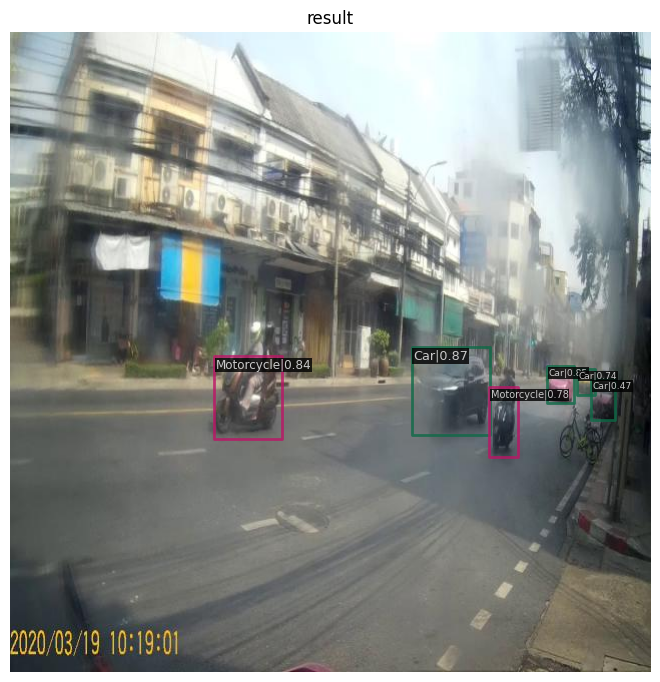

In [25]:
# img = mmcv.imread('/content/drive/MyDrive/mmdetection/front-top-traffic-video-3/test/11304_png.rf.c98912a6c6857a28bee1da26a4abe837.jpg')

img = mmcv.imread('/content/drive/MyDrive/mmdetection/Sideview-traffic-video-5/test/470_jpg.rf.8f9200d5523024abb380086280bd9a3d.jpg')

# model.cfg = cfg
# result = inference_detector(model, img)
# show_result_pyplot(model, img, result)

config_file = 'configs/yolox/yolox_x_8x8_300e_coco.py'
# checkpoint_file = 'train_yolox_x_on_front-top-traffic-video-3/best_bbox_mAP_epoch_297.pth'
checkpoint_file = 'train_yolox_x_on_Sideview-traffic-video-3/epoch_84.pth'
score = 0.1
iou = 0.7
model_config = dict(
    model=dict(
        bbox_head=dict(num_classes=6)
        ,test_cfg=dict(
            score_thr=score,
            nms=dict(iou_threshold=iou)
        )
    )
)
model2 = init_detector(config_file, checkpoint_file, device='cuda:0',cfg_options=model_config)  # or device='cuda:0'
result = inference_detector(model2, img)
show_result_pyplot(model2, img, result,)

In [ ]:
img.shape

(640, 640, 3)